<a href="https://colab.research.google.com/github/bebeksalju/Data-Analytics-Data-Science-Portfolio/blob/main/Machine_Learning_Job_Postings_in_the_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis Tren Pekerjaan Machine Learning**
- Tujuan: Identifikasi tren pekerjaan ML berdasarkan waktu, lokasi, dan level senioritas.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 1000_ml_jobs_us.csv to 1000_ml_jobs_us.csv


**Cek Struktur kolom pada data**

In [13]:
import pandas as pd
df = pd.read_csv('1000_ml_jobs_us.csv', parse_dates=['job_posted_date'])
print(df.shape)
df.head()

(997, 10)


,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


Apakah ada peningkatan signifikan di bulan tertentu?

<Axes: title={'center': 'Tren lowongan kerja ML per-Bulan'}, xlabel='month_year'>

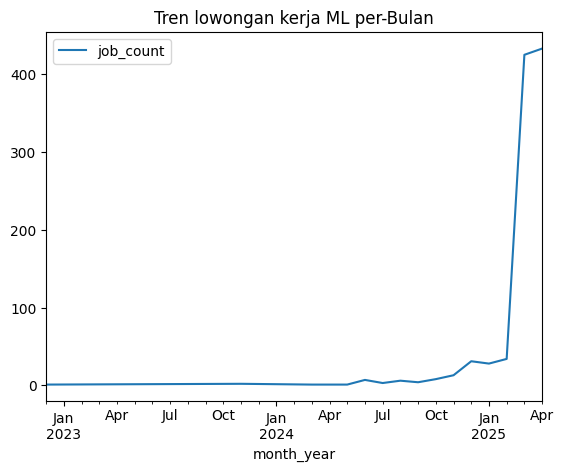

In [6]:
df['month_year'] = df['job_posted_date'].dt.to_period('M')
trend = df.groupby('month_year').size().reset_index(name='job_count')
trend.plot(x='month_year', y='job_count', kind='line', title='Tren lowongan kerja ML per-Bulan')

San Fransisco dan Los Angeles mendominasi karena adanya Adobe, Netflix, dan Startup AI

<Axes: title={'center': 'Top 5 kota dengan banyak lowongan kerja ML'}, xlabel='company_address_locality'>

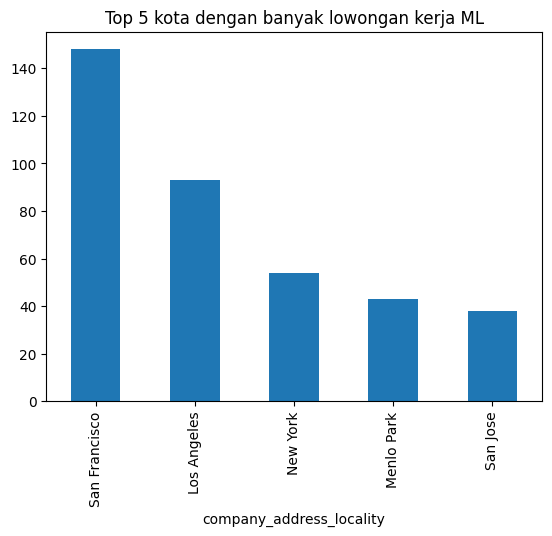

In [7]:
top_cities = df['company_address_locality'].value_counts().head(5)
top_cities.plot(kind='bar', title='Top 5 kota dengan banyak lowongan kerja ML')

37,6% lowongan untuk Mid-Senior level, diikuti 30,4% untuk Enrty Level, menunjukkan permintaan tinggi untuk talenta pemula di ML

<Axes: title={'center': 'Distribusi Level senioritas lowongan kerja ML'}, ylabel='count'>

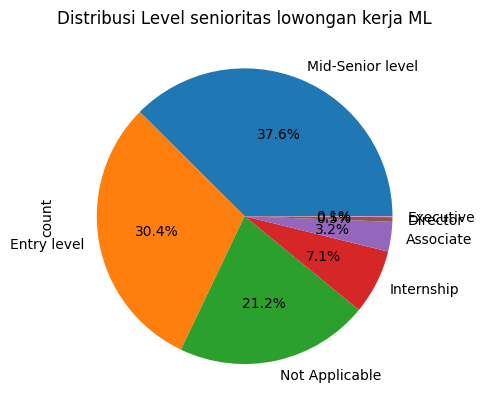

In [9]:
seniority_dist = df['seniority_level'].value_counts()
seniority_dist.plot(kind='pie', autopct='%1.1f%%', title='Distribusi Level senioritas lowongan kerja ML')

New York lebih banyak peran Mid-Senior, sedangkan Los Angeles didominasi oleh Entry Level.

Text(0.5, 1.0, 'Distribusi senioritas di kota TOp')

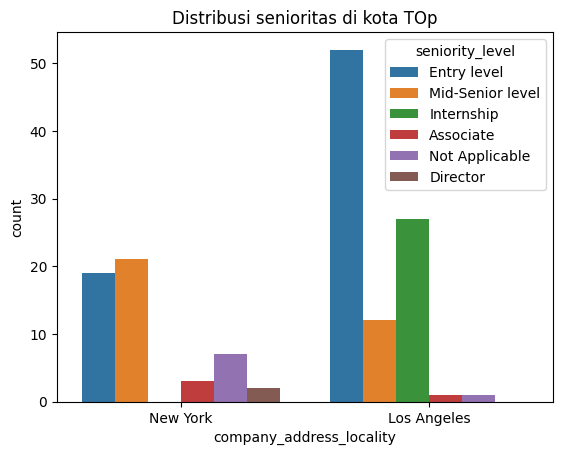

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

top_3_cities = df[df['company_address_locality'].isin([
    'Los Angeles', 'San Fransisco', 'New York'
])]

sns.countplot(
    data = top_3_cities,
    x = 'company_address_locality',
    hue='seniority_level'
)

plt.title('Distribusi senioritas di kota TOp')

In [12]:
trend.to_csv('tren_lowongan_per_bulan.csv', index=False)

Latihan 1 Data Analytics

Nama: Hans
Asal: Surabaya